## 유저 - 도서 그룹 간 베타 분포 매칭

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
reward_test = pd.read_csv('./reward_may.csv',encoding='utf-8')

In [ ]:
reward_train = pd.read_csv('./reward.csv',encoding='utf-8')

In [ ]:
reward_train_new = reward_train.iloc[np.random.randint(0,10000000,100000)]

In [ ]:
user_0 = reward_train_new[reward_train_new.user_cluster == 0.0]
user_1 = reward_train_new[reward_train_new.user_cluster == 1.0]
user_2 = reward_train_new[reward_train_new.user_cluster == 2.0]
user_3 = reward_train_new[reward_train_new.user_cluster == 3.0]
user_4 = reward_train_new[reward_train_new.user_cluster == 4.0]
user_5 = reward_train_new[reward_train_new.user_cluster == 5.0]

In [ ]:
# user_0에 대해 book 카테고리 별로 reward가 1인 것의 비율을 구함
# t: total, s: success, f: fail
t_0 = user_0[['purchase','book_cluster']].groupby('book_cluster').count().T
s_0 = user_0[['purchase','book_cluster']].groupby('book_cluster').sum().T
f_0 = t_0 - s_0

# 성공/실패 횟수를 저장한 후 유저 0~5 정보에 대해 결합시킴
u0 = pd.concat([s_0,f_0])
u0.index = ['user0_success','user0_fail']

# 유저 1
t_1 = user_1[['purchase','book_cluster']].groupby('book_cluster').count().T
s_1 = user_1[['purchase','book_cluster']].groupby('book_cluster').sum().T
f_1 = t_1 - s_1
u1 = pd.concat([s_1,f_1])
u1.index = ['user1_success','user1_fail']

# 유저 2
t_2 = user_2[['purchase','book_cluster']].groupby('book_cluster').count().T
s_2 = user_2[['purchase','book_cluster']].groupby('book_cluster').sum().T
f_2 = t_2 - s_2
u2 = pd.concat([s_2,f_2])
u2.index = ['user2_success','user2_fail']

# 유저 3
t_3 = user_3[['purchase','book_cluster']].groupby('book_cluster').count().T
s_3 = user_3[['purchase','book_cluster']].groupby('book_cluster').sum().T
f_3 = t_3 - s_3
u3 = pd.concat([s_3,f_3])
u3.index = ['user3_success','user3_fail']

# 유저 4
t_4 = user_4[['purchase','book_cluster']].groupby('book_cluster').count().T
s_4 = user_4[['purchase','book_cluster']].groupby('book_cluster').sum().T
f_4 = t_4 - s_4
u4 = pd.concat([s_4,f_4])
u4.index = ['user4_success','user4_fail']

# 유저 5
t_5 = user_5[['purchase','book_cluster']].groupby('book_cluster').count().T
s_5 = user_5[['purchase','book_cluster']].groupby('book_cluster').sum().T
f_5 = t_5 - s_5
u5 = pd.concat([s_5,f_5])
u5.index = ['user5_success','user5_fail']

In [ ]:
# 유저 - book 에 대한 베타 분포를 학습하기 위해
# 각 상황에 대한 성공/실패 횟수를 저장함

user_beta = pd.concat([u0,u1,u2,u3,u4,u5])

In [ ]:
user_beta

book_cluster,0.0,1.0,2.0,3.0,4.0
user0_success,183.0,239.0,169.0,432.0,251.0
user0_fail,435.0,590.0,488.0,1036.0,579.0
user1_success,15.0,13.0,25.0,551.0,42.0
user1_fail,51.0,75.0,92.0,821.0,110.0
user2_success,154.0,262.0,160.0,388.0,240.0
user2_fail,291.0,546.0,411.0,795.0,476.0
user3_success,641.0,1047.0,586.0,1467.0,771.0
user3_fail,1265.0,2212.0,1618.0,3023.0,1831.0
user4_success,140.0,209.0,113.0,328.0,181.0
user4_fail,259.0,397.0,294.0,618.0,361.0


In [ ]:
user_beta.to_csv('./beta_distribution_user.csv',index=True)

In [ ]:
yes24_test = pd.read_csv('./test_100.csv',encoding='utf-8')

In [ ]:
user_1000 = yes24_test[['account_id','user_cluster']]
user_1000 = user_1000.astype(int)

In [ ]:
# 베타 분포를 학습

# 유저 천 명에 대한 베타 분포
# book_history 배열은 유저 클러스터에 대해 가장 큰 성공 확률을 주는 book cluster를 저장하는 배열
book_history = []

for i in range(len(user_1000)):
    # 유저 1000명 대상
    cluster = user_1000.iloc[i][1]
    
    beta_history = []
    
    for arm in range(0,5):
        # cluster에 대해 사후 베타 분포 확률 값을 샘플링
        # [앞서 정의한 유저 클러스터 - 북 클러스터 간의 성공/실패 누적 횟수를 이용]
        beta_sample = beta.rvs(user_beta.iloc[cluster*2][arm] + 1, user_beta.iloc[cluster*2+1][arm] + 1)
        beta_history.append(beta_sample)
    # 그 중 가장 큰 샘플링 값을 주는 book group을 인덱싱함
    book_cluster = np.argmax(beta_history)
    # book history에 해당 max idx의 count를 저장함
    book_history.append(book_cluster)

In [ ]:
temp = pd.concat([pd.DataFrame(book_history),yes24_test[['book_cluster','purchase']]],axis=1)

In [ ]:
temp.columns = ['beta','real','purchase']

In [ ]:
# 유저 - 북 간의 reward를 학습시키기 위한 테스트 데이터
yes24_test

,account_id,product_id,price,purchase,book_cluster,user_cluster
0,113512,89940862,0.0,0.0,4.0,3.0
1,113512,84434768,0.0,0.0,2.0,3.0
2,113512,74393338,0.0,0.0,2.0,3.0
3,113512,90108425,0.0,0.0,3.0,3.0
4,113512,85927898,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...
4128,16790454,90061659,0.0,0.0,3.0,1.0
4129,16790454,89222585,14400.0,1.0,3.0,1.0
4130,16790454,89903437,0.0,0.0,3.0,1.0
4131,16790454,90114596,0.0,0.0,3.0,1.0


In [ ]:
# beta 분포를 통해 기대하는 북 그룹 / 실제 추천받은 그룹 / 구매 여부
temp

,beta,real,purchase
0,1,4.0,0.0
1,0,2.0,0.0
2,0,2.0,0.0
3,0,3.0,0.0
4,0,3.0,0.0
...,...,...,...
4128,3,3.0,0.0
4129,3,3.0,1.0
4130,3,3.0,0.0
4131,3,3.0,0.0


In [ ]:
# 구매한 것의 book group 비율
temp[temp.purchase==1].real.value_counts()/len(temp)

3.0    0.067989
1.0    0.040890
2.0    0.027099
4.0    0.019840
0.0    0.015001
Name: real, dtype: float64

In [ ]:
# 베타 분포를 통해 추천된 book group 비율
temp.beta.value_counts()/len(temp)

0    0.544883
3    0.317445
1    0.078393
4    0.058795
2    0.000484
Name: beta, dtype: float64

In [ ]:
temp.to_csv('./beta_order.csv',index=False)

In [ ]:
yes24_test.groupby('user_cluster').sum()
yes24_test.groupby('user_cluster').count()
ratio = yes24_test.groupby('user_cluster').sum() / yes24_test.groupby('user_cluster').count()

,account_id,product_id,price,purchase,book_cluster,0,1,2,3,4
user_cluster,,,,,,,,,,
0.0,1322033686,17505707340,518670.0,35.0,711.0,4.0,32.0,44.0,145.0,39.0
1.0,6882936779,49969733995,1297170.0,92.0,1813.0,31.0,48.0,64.0,455.0,68.0
2.0,974797865,13471113334,503550.0,37.0,507.0,5.0,81.0,37.0,96.0,16.0
3.0,11834227065,147015467903,6557140.0,506.0,5650.0,319.0,588.0,513.0,952.0,295.0
4.0,608610537,15078151073,362610.0,26.0,558.0,22.0,27.0,49.0,111.0,25.0
5.0,504753046,4672099536,158130.0,10.0,159.0,4.0,4.0,26.0,29.0,4.0


In [ ]:
# user - book 그룹 간의 실제 구매 비율
ratio.iloc[:,3:10]

,purchase,book_cluster,0,1,2,3,4
user_cluster,,,,,,,
0.0,0.132576,2.693182,0.015152,0.121212,0.166667,0.549242,0.147727
1.0,0.138138,2.722222,0.046547,0.072072,0.096096,0.683183,0.102102
2.0,0.157447,2.157447,0.021277,0.344681,0.157447,0.408511,0.068085
3.0,0.189726,2.118485,0.119610,0.220472,0.192351,0.356955,0.110611
4.0,0.111111,2.384615,0.094017,0.115385,0.209402,0.474359,0.106838
5.0,0.149254,2.373134,0.059701,0.059701,0.388060,0.432836,0.059701


In [ ]:
# book 그룹의 실재 구매 비율
pd.DataFrame(yes24_test.book_cluster.value_counts()/len(yes24_test))

,book_cluster
3.0,0.432616
1.0,0.188725
2.0,0.177353
4.0,0.108154
0.0,0.093153


In [ ]:
import matplotlib.pyplot as plt
import scipy as sp

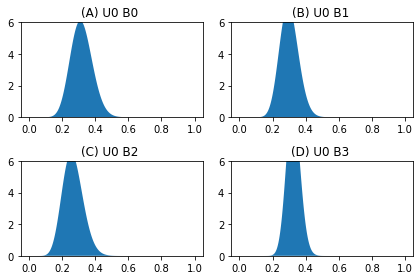

In [ ]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(161776/10000, 347100/10000).pdf(xx))
plt.ylim(0, 6)
plt.title("(A) U0 B0 ")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(198441/10000, 462892/10000).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) U0 B1 ")
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(137113/10000, 378935/10000).pdf(xx))
plt.ylim(0, 6)
plt.title("(C) U0 B2 ")
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(410087/10000, 850785/10000).pdf(xx))
plt.ylim(0, 6)
plt.title("(D) U0 B3 ")
plt.tight_layout()
plt.show()

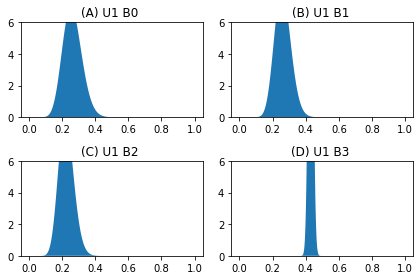

In [ ]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(15433/1000, 43289/1000).pdf(xx))
plt.ylim(0, 6)
plt.title("(A) U1 B0 ")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(20873/1000, 58887/1000).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) U1 B1 ")
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(19071/1000, 65213/1000).pdf(xx))
plt.ylim(0, 6)
plt.title("(C) U1 B2 ")
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(558215/1000, 739651/1000).pdf(xx))
plt.ylim(0, 6)
plt.title("(D) U1 B3 ")
plt.tight_layout()
plt.show()

## 모델링

### 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
reward = pd.read_csv('./reward.csv',encoding='utf-8')

In [ ]:
reward.shape

(24024943, 5)

In [ ]:
reward

,account_id,product_id,purchase,book_cluster,user_cluster
0,100001,88440267,1.0,3.0,3.0
1,100001,88440267,1.0,3.0,3.0
2,100001,85951536,1.0,3.0,3.0
3,100001,85951536,1.0,3.0,3.0
4,100001,86895523,0.0,3.0,3.0
...,...,...,...,...,...
24024938,16837205,65060443,1.0,0.0,2.0
24024939,16837205,42763617,1.0,0.0,2.0
24024940,16837207,84678826,1.0,3.0,2.0
24024941,16837207,22791986,0.0,0.0,2.0


In [ ]:
context = pd.read_csv('./full_context.csv',encoding='utf-8')

In [ ]:
context.shape

In [ ]:
context_1000 = context.iloc[:1000,1:]

In [ ]:
reward_1000 = reward.iloc[:1000]
reward_1000 = reward_1000['purchase']

### Linear Thompson Modeling

In [ ]:
# narmas: 책 그룹의 개수, 유저 그룹를 input으로 받아 책 그룹을 추천했을 때 성공한 reward
# ndims: context vector의 차원 수, feature 수, 설명 변수의 수
narms = 5
ndims = 72
v = 0.9

# 규제 파라미터가 없는 공분산 행렬 Eye (I)
b = np.identity(ndims)
B = np.vstack((b,b,b,b,b))

# 평균 회귀 계수
mu_hat = np.zeros((ndims,narms))

# X.T * Y의 누적, 실제 reward와 예측 reward의 차이를 구하기 위한 매게변수
f = np.zeros(ndims)
F = np.vstack((f,f,f,f,f))

arm_number = reward['book_cluster'].iloc[:1200].astype('int')

bounds = np.zeros(narms)

In [ ]:
for i in context_1000.index:
    
    j = arm_number[i]
    
    # 사후 분포를 통해 계산된 회귀 계수 추정치 Mu_hat
    mean = np.transpose(mu_hat)[j]
    # 람다 * Eye의 Inverse, 업데이트된 사후 분포의 공분산
    covariance_matrix = ((v)**2)*np.linalg.inv(B[ndims*j:ndims*j+ndims])
    
    # 회귀 계수 sampling   in multivarate_normal 분포 (가우스 정규분포)
    samples = np.random.multivariate_normal(mean, covariance_matrix)
    sample_mu_tilde = np.expand_dims(samples,axis=1)
    
    arm_context = np.expand_dims(np.transpose(context_1000.iloc[i]),axis=1)
    # 누적된 추정치의 Reward값
    # X.T * 회귀 계수의 추정치 베타(B) = 추정치
    bounds[j] = bounds[j] + np.dot(np.transpose(arm_context),sample_mu_tilde)[0][0]
    
    # 업데이트
    # precision = [X.T * X + 람다 * Eye]
    # Cov 는 향후 Precision의 인버스 값
    B[ndims*j:ndims*j+ndims] = B[ndims*j:ndims*j+ndims] + np.dot(arm_context,np.transpose(arm_context))
    # F는 실제 리워드와 예측 리워드 bound의 차이를 계산하기 위한 업데이트 매게 변수
    # F = X.T * Y
    F[j] = F[j] + np.squeeze(arm_context)*reward_1000[i]
    # 추정 mu : (X.T* X + 람다* Eye).Inverse * (X.T * Y)
    # Y = X.T * B에서, B: (X.T * X + 람다 I).invese * (X.T * Y)에 해당하는 값
    np.transpose(mu_hat)[j] = np.dot(np.linalg.inv(B[ndims*j:ndims*j+ndims]),F[j])

In [ ]:
bounds

array([ 26.91224399,  55.85019365,  -3.1322682 , 106.50657819,
        69.36519875])

In [ ]:
bounds/1000

array([ 0.02691224,  0.05585019, -0.00313227,  0.10650658,  0.0693652 ])

In [ ]:
r1000 = reward.iloc[:1000]
r1000 = r1000[['purchase','book_cluster']]

In [ ]:
r1000.groupby('book_cluster').sum()/1000

,purchase
book_cluster,
0.0,0.036
1.0,0.115
2.0,0.023
3.0,0.111
4.0,0.049


In [ ]:
test = context.iloc[1000:1100,1:]

In [ ]:
test

,gender_0.0,gender_1.0,g_age_0.0,g_age_1.0,g_age_2.0,g_age_3.0,g_age_4.0,g_age_5.0,g_age_6.0,most_pref_1.0,...,cat34.0,pub0.0,pub1.0,pub2.0,pub3.0,pub4.0,pri0.0,pri1.0,pri2.0,pri3.0
1000,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.236211,0.000000,0.0,0.263816,0.000000,0.0
1001,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.327535,0.0,0.263816,0.000000,0.0
1002,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.236211,0.000000,0.0,0.263816,0.000000,0.0
1003,0.659485,0.0,0.0,0.0,0.0,0.0,0.316895,0.0,0.0,0.0,...,0.0,0.0,0.129505,0.0,0.000000,0.000000,0.0,0.000000,0.371458,0.0
1004,0.659485,0.0,0.0,0.0,0.0,0.0,0.316895,0.0,0.0,0.0,...,0.0,0.0,0.129505,0.0,0.000000,0.000000,0.0,0.263816,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.232846,0.000000,0.0,0.264633,0.000000,0.0
1096,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.232846,0.000000,0.0,0.264633,0.000000,0.0
1097,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.232846,0.000000,0.0,0.264633,0.000000,0.0
1098,0.666066,0.0,0.0,0.0,0.0,0.0,0.396425,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.324797,0.0,0.264633,0.000000,0.0


In [ ]:
i = 10001
j = arm_number[1001]

In [ ]:
j

1

In [ ]:
mean = np.transpose(mu_hat)[j]
covariance_matrix = ((v)**2)*np.linalg.inv(B[ndims*j:ndims*j+ndims])

In [ ]:
B[72:144]

array([[107.474554  ,   0.        ,   0.        , ...,  21.43466274,
          0.        ,   0.        ],
       [  0.        ,   5.2374517 ,   0.        , ...,   3.17456827,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 21.43466274,   3.17456827,   0.        , ...,  13.17564431,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ]])

In [ ]:
F[1]

array([6.92708686e+01, 3.67327352e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.50176688e+01, 1.22891748e+01, 1.38662617e-01,
       1.04440086e-02, 0.00000000e+00, 0.00000000e+00, 1.22661071e+00,
       0.00000000e+00, 7.66128684e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.87915259e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.03464416e+00, 0.00000000e+00, 8.17316811e+00, 1.84876146e-01,
       0.00000000e+00, 0.00000000e+00, 1.06693666e+02, 1.42133946e-01,
       2.21252948e+00, 7.99413194e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.07425906e-01, 6.24312506e-02,
      

In [ ]:
mu_hat.T[1]

array([ 0.10169725,  0.47638799,  0.        ,  0.        ,  0.        ,
        0.17634052, -0.19862435,  0.0627501 ,  0.00403337,  0.        ,
        0.        ,  0.22956046, -0.00675947,  0.02958709, -0.00477388,
        0.        ,  0.        ,  0.        , -0.00317188,  0.        ,
        0.        ,  0.        ,  0.00514136,  0.        , -0.00753831,
        0.        ,  0.        , -0.07178677,  0.08078577,  0.        ,
        0.08491339,  0.13148385, -0.27093344,  0.        ,  0.21110643,
        0.06432372,  0.27115088,  0.35921174,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.15974377,
        0.03378969, -0.1284057 ,  0.06565097,  0.        , -0.41108745,
       -0.1170032 ,  0.02917303, -0.00450911,  0.        , -0.04113469,
        0.2749041 , -0.05948939, -0.19839395,  0.68805035, -0.66

In [ ]:
mean

array([ 0.10169725,  0.47638799,  0.        ,  0.        ,  0.        ,
        0.17634052, -0.19862435,  0.0627501 ,  0.00403337,  0.        ,
        0.        ,  0.22956046, -0.00675947,  0.02958709, -0.00477388,
        0.        ,  0.        ,  0.        , -0.00317188,  0.        ,
        0.        ,  0.        ,  0.00514136,  0.        , -0.00753831,
        0.        ,  0.        , -0.07178677,  0.08078577,  0.        ,
        0.08491339,  0.13148385, -0.27093344,  0.        ,  0.21110643,
        0.06432372,  0.27115088,  0.35921174,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.15974377,
        0.03378969, -0.1284057 ,  0.06565097,  0.        , -0.41108745,
       -0.1170032 ,  0.02917303, -0.00450911,  0.        , -0.04113469,
        0.2749041 , -0.05948939, -0.19839395,  0.68805035, -0.66

In [ ]:
covariance_matrix

array([[ 0.20541315,  0.2569249 ,  0.        , ...,  0.00916099,
         0.        ,  0.        ],
       [ 0.2569249 ,  0.53648529, -0.        , ..., -0.03641934,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.81      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00916099, -0.03641934,  0.        , ...,  0.26709913,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.81      ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.81      ]])

In [ ]:
samples = np.random.multivariate_normal(mean, covariance_matrix)+np.random.randn(ndims)
sample_mu_tilde = np.expand_dims(samples,axis=1)

In [ ]:
sample_mu_tilde.shape

(72, 1)

In [ ]:
arm_context = np.expand_dims(np.transpose(test.iloc[1]),axis=1)

In [ ]:
B[ndims*j:ndims*j+ndims] = B[ndims*j:ndims*j+ndims] + np.dot(arm_context,np.transpose(arm_context))
F[j] = F[j] + np.squeeze(arm_context)*reward.iloc[1001][2]
np.transpose(mu_hat)[j] = np.dot(np.linalg.inv(B[ndims*j:ndims*j+ndims]),F[j])

In [ ]:
reward.iloc[1001][2]

0.0

In [ ]:
np.dot(np.transpose(arm_context),sample_mu_tilde)

array([[-0.04016789]])

In [ ]:
B[72:144]

array([[108.80548592,   0.        ,   0.        , ...,  21.96181844,
          0.        ,   0.        ],
       [  0.        ,   5.2374517 ,   0.        , ...,   3.17456827,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 21.96181844,   3.17456827,   0.        , ...,  13.38444021,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ]])

In [ ]:
F[1]

array([6.92708686e+01, 3.67327352e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.50176688e+01, 1.22891748e+01, 1.38662617e-01,
       1.04440086e-02, 0.00000000e+00, 0.00000000e+00, 1.22661071e+00,
       0.00000000e+00, 7.66128684e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.87915259e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.03464416e+00, 0.00000000e+00, 8.17316811e+00, 1.84876146e-01,
       0.00000000e+00, 0.00000000e+00, 1.06693666e+02, 1.42133946e-01,
       2.21252948e+00, 7.99413194e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.07425906e-01, 6.24312506e-02,
      

In [ ]:
mu_hat.T[1]

array([ 0.0930866 ,  0.47662776,  0.        ,  0.        ,  0.        ,
        0.18317585, -0.20955348,  0.06292453,  0.00401889,  0.        ,
        0.        ,  0.2467448 , -0.00661838,  0.0294809 , -0.00484855,
        0.        ,  0.        ,  0.        , -0.00309018,  0.        ,
        0.        ,  0.        ,  0.00510926,  0.        , -0.00724499,
        0.        ,  0.        , -0.07150118,  0.08407032,  0.        ,
        0.09553267,  0.13405108, -0.33661854,  0.        ,  0.21716392,
        0.06344399,  0.27010536,  0.3532111 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.16204211,
        0.03492834, -0.12783222,  0.06838065,  0.        , -0.4101927 ,
       -0.11109931, -0.00566553, -0.00317627,  0.        , -0.04070396,
        0.28110759, -0.07575798, -0.18875318,  0.69556003, -0.66